## Sentiment Analysis
## By: Preeti Priyanka Tripathy


In [4]:
!pip install textblob 

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 3.3 MB/s eta 0:00:00


In [8]:
#Importing Libraries
import seaborn as sns
import pandas as pd
import re   # Regular expressions module 
from textblob import TextBlob # for extracting sentiments
import matplotlib.pyplot as plt


# Create a sample dataset with more comments
data = {
    'text': [
        "Just landed my first job offer 🎉",
"Traffic jam ruined my whole evening 😡",
"Had a productive workout session 💪",
"I'm not sure how I feel about this news.",
"Such a breathtaking sunset today 🌅",
"Feeling sick and exhausted 🤒",
"Work deadlines are stressful but motivating.",
"Happy to reconnect with an old friend 😊",
"This gadget is overpriced and disappointing.",
"Life feels unpredictable these days.",
"Delicious food makes everything better 🍕" ,
"Missed my flight, what a disaster!",
"Excited to start my new project tomorrow!",
"The service at this restaurant was terrible.",
"Calmly waiting for the results.",
"Lost my phone today, really upset 😔",
"Grateful for small wins along the way 🙏",
"Not bad, but could have been better.",
"Over the moon about this achievement 🌙",
"Wish things had turned out differently.",
"Enjoying the rain with a hot cup of tea ☕",
"Feeling anxious about the big presentation.",
"Nothing special happened today.",
"Best concert experience ever! 🎶",
"Still processing everything that happened.",
    ]
}

# Create DataFrame
comments = pd.DataFrame(data)
comments.head()

,text
0,Just landed my first job offer 🎉
1,Traffic jam ruined my whole evening 😡
2,Had a productive workout session 💪
3,I'm not sure how I feel about this news.
4,Such a breathtaking sunset today 🌅


In [10]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25 non-null     object
dtypes: object(1)
memory usage: 332.0+ bytes


##### Cleaning Text

In [16]:
def clean_text(text):
    # Remove URL
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text) #special char
    text = re.sub(r'\d+', '', text) #digits
    # Convert to lowercase
    text = text.lower()
    return text

# Apply text cleaning to the 'text' column
comments['clean_text'] = comments['text'].apply(clean_text)

comments.head()

,text,clean_text
0,Just landed my first job offer 🎉,just landed my first job offer
1,Traffic jam ruined my whole evening 😡,traffic jam ruined my whole evening
2,Had a productive workout session 💪,had a productive workout session
3,I'm not sure how I feel about this news.,im not sure how i feel about this news
4,Such a breathtaking sunset today 🌅,such a breathtaking sunset today


##### Sentiment Analysis using TextBlob

In [20]:
# Function to get sentiment polarity using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the cleaned text
comments['sentiment'] = comments['clean_text'].apply(get_sentiment)

comments.head()

,text,clean_text,sentiment
0,Just landed my first job offer 🎉,just landed my first job offer,0.25
1,Traffic jam ruined my whole evening 😡,traffic jam ruined my whole evening,0.20
2,Had a productive workout session 💪,had a productive workout session,0.00
3,I'm not sure how I feel about this news.,im not sure how i feel about this news,-0.25
4,Such a breathtaking sunset today 🌅,such a breathtaking sunset today,0.50


In [22]:
# Function to categorize sentiment
def categorize_sentiment(sentiment):
    if sentiment > 0:
        return 'Positive'
    elif sentiment == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Create new column for sentiment category
comments['sentiment_category'] = comments['sentiment'].apply(categorize_sentiment)

comments.head()

,text,clean_text,sentiment,sentiment_category
0,Just landed my first job offer 🎉,just landed my first job offer,0.25,Positive
1,Traffic jam ruined my whole evening 😡,traffic jam ruined my whole evening,0.20,Positive
2,Had a productive workout session 💪,had a productive workout session,0.00,Neutral
3,I'm not sure how I feel about this news.,im not sure how i feel about this news,-0.25,Negative
4,Such a breathtaking sunset today 🌅,such a breathtaking sunset today,0.50,Positive


C:\Users\preet\AppData\Local\Temp\ipykernel_20180\400978260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=comments, palette='viridis')


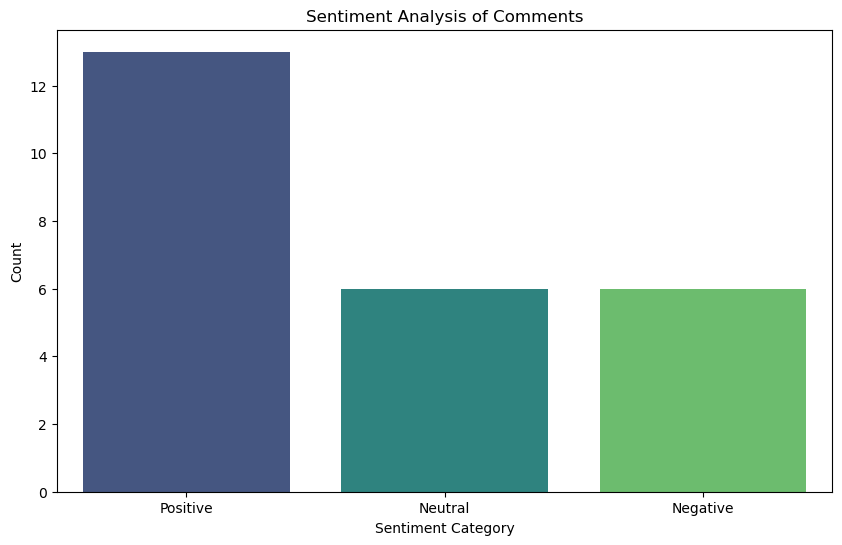

sentiment_category
Positive    13
Neutral      6
Negative     6
Name: count, dtype: int64


In [33]:
# Plotting sentiment count using Seaborn library

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', data=comments, palette='viridis')
plt.title('Sentiment Analysis of Comments')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

print(comments['sentiment_category'].value_counts())